## Markdown Cell -- Probably Table of Contents

In [36]:
#import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
#loading dataframe

df = pd.read_csv('COVID-19_case_surveillance_wrangled.csv')
df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_and_ethnicity,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-11-14,2020-11-10,2020-11-10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
1,2020-11-19,2020-11-10,2020-11-09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020-11-13,2020-11-10,2020-11-10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
3,2020-11-09,2020-11-10,2020-11-09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
4,2020-11-06,2020-11-10,2020-11-06,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


In [24]:
#looking at size of dataframe

df.shape

(294946, 11)

In [25]:
#examining datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294946 entries, 0 to 294945
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   cdc_report_dt       294946 non-null  object
 1   pos_spec_dt         294946 non-null  object
 2   onset_dt            294946 non-null  object
 3   current_status      294946 non-null  object
 4   sex                 294946 non-null  object
 5   age_group           294946 non-null  object
 6   race_and_ethnicity  294946 non-null  object
 7   hosp_yn             294946 non-null  object
 8   icu_yn              294946 non-null  object
 9   death_yn            294946 non-null  object
 10  medcond_yn          294946 non-null  object
dtypes: object(11)
memory usage: 24.8+ MB


## Explanation of Columns

- cdc_report_dt: Date CDC reported
    
- pos_spec_dt: Date of positive specimen collected
    
- onset_dt: The start date when person experienced Covid-19 symtoms
    
- current_status: Laboratory or confirmed case
    
- sex: sex of person
    
- age_group: demographic group of patient
    
- race and ethnicity (combined): race and ethnicity of patient
    
- hosp_yn: was patient hospitalized
    
- icu_yn: was patient in ICU
    
- death_yn: did patient die
    
- medcond_yn: did patient have underlying conditions

In [26]:
#making a copy of dataframe df_wrangle

df_viz = df.copy()

In [27]:
#converting first three columns to datetime and rest to categorical

for count,column in enumerate(df_viz.columns):
    if count <=2:
        df_viz[column] = pd.to_datetime(df_viz[column])
    else:
        df_viz[column] = df_viz[column].astype('category')

In [28]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294946 entries, 0 to 294945
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   cdc_report_dt       294946 non-null  datetime64[ns]
 1   pos_spec_dt         294946 non-null  datetime64[ns]
 2   onset_dt            294946 non-null  datetime64[ns]
 3   current_status      294946 non-null  category      
 4   sex                 294946 non-null  category      
 5   age_group           294946 non-null  category      
 6   race_and_ethnicity  294946 non-null  category      
 7   hosp_yn             294946 non-null  category      
 8   icu_yn              294946 non-null  category      
 9   death_yn            294946 non-null  category      
 10  medcond_yn          294946 non-null  category      
dtypes: category(8), datetime64[ns](3)
memory usage: 9.0 MB


In [29]:
df_viz['cdc_report_dt'].value_counts()

2020-11-17    8616
2020-11-10    8287
2020-11-04    5517
2020-08-09    4599
2020-08-20    4456
              ... 
2020-01-17       1
2020-02-22       1
2020-02-15       1
2020-02-08       1
2020-01-29       1
Name: cdc_report_dt, Length: 292, dtype: int64

In [30]:
df_viz.sort_values(by='cdc_report_dt', ascending=False)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_and_ethnicity,hosp_yn,icu_yn,death_yn,medcond_yn
136388,2020-11-19,2020-11-19,2020-11-19,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",Yes,No,No,Yes
136212,2020-11-19,2020-11-18,2020-11-15,Probable Case,Female,60 - 69 Years,"White, Non-Hispanic",No,No,No,Yes
2193,2020-11-19,2020-11-19,2020-11-19,Laboratory-confirmed case,Male,10 - 19 Years,"White, Non-Hispanic",No,No,No,No
149933,2020-11-19,2020-11-23,2020-11-19,Laboratory-confirmed case,Female,50 - 59 Years,"White, Non-Hispanic",No,No,No,Yes
2195,2020-11-19,2020-11-19,2020-11-19,Laboratory-confirmed case,Male,10 - 19 Years,"White, Non-Hispanic",No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
131455,2020-01-15,2020-05-05,2020-01-15,Laboratory-confirmed case,Male,50 - 59 Years,Hispanic/Latino,No,No,No,Yes
148902,2020-01-13,2020-11-16,2020-01-13,Laboratory-confirmed case,Female,50 - 59 Years,"White, Non-Hispanic",No,No,No,Yes
126166,2020-01-13,2020-04-05,2020-01-13,Laboratory-confirmed case,Male,50 - 59 Years,"White, Non-Hispanic",Yes,Yes,No,Yes
247930,2020-01-01,2020-07-14,2020-01-01,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",No,No,No,Yes


In [31]:
df_viz['sex']=df_viz['sex'].replace('Other', np.nan)

In [32]:
df_viz['sex'].value_counts()

Female    157155
Male      137754
Name: sex, dtype: int64

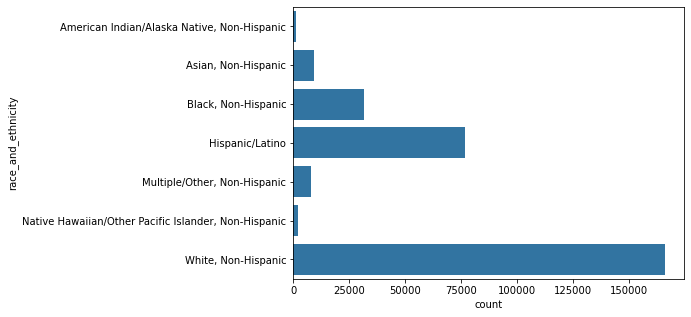

In [59]:
#seaborn countplot showing distribution of race and ethnicity
plt.figure(figsize=[7,5]);

tick_range1 = np.arange(0,150000+25000,25000)
base_color = sns.color_palette()[0]
sns.countplot(data=df_viz, y='race_and_ethnicity', color=base_color);
plt.xticks(tick_range1);

In [33]:
type_counts=df_viz['age_group'].value_counts()
num_group = type_counts.sum()
max_age = type_counts[0]
max_prop = max_age / num_group

tick_range2 = np.arange(0, max_prop+0.02, 0.02)
ticks2 = ['{:0.1%}'.format(x) for x in tick_range2]
ticks2

['0.0%',
 '2.0%',
 '4.0%',
 '6.0%',
 '8.0%',
 '10.0%',
 '12.0%',
 '14.0%',
 '16.0%',
 '18.0%']

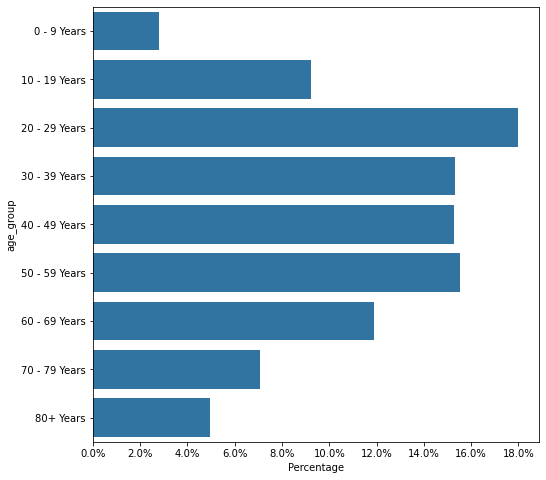

In [35]:
#seaborn countplot showing distribution of age_group
type_counts=df_viz['age_group'].value_counts()
num_group = type_counts.sum()
max_age = type_counts[0]
max_prop = max_age / num_group

tick_range2 = np.arange(0, max_prop+0.02, 0.02)
ticks2 = ['{:0.1%}'.format(x) for x in tick_range2]

plt.figure(figsize=[8,8]);

sns.countplot(data=df_viz, y='age_group', color=base_color);
plt.xlabel('Percentage')
plt.xticks(tick_range2*num_group, ticks2);

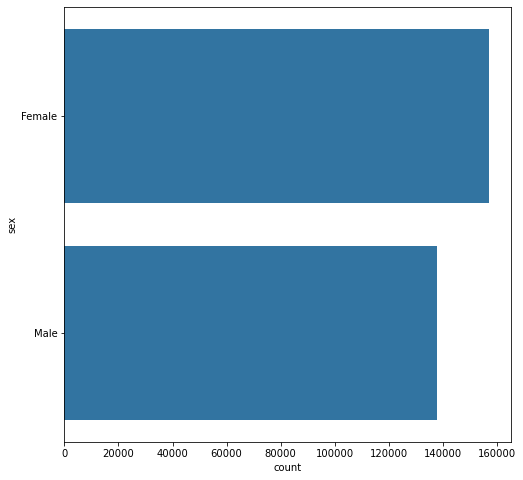

In [48]:
#seaborn countplot showing distribution of sex

plt.figure(figsize=[8,8]);

sns.countplot(data=df_viz, y='sex', color=base_color);

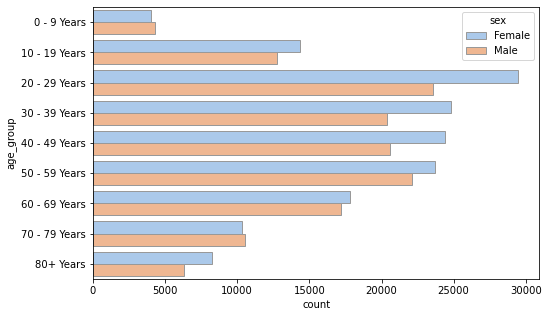

In [41]:
plt.figure(figsize=[8,5])

sns.countplot(y='age_group', hue="sex",
            palette="pastel", edgecolor=".6",
            data=df_viz);

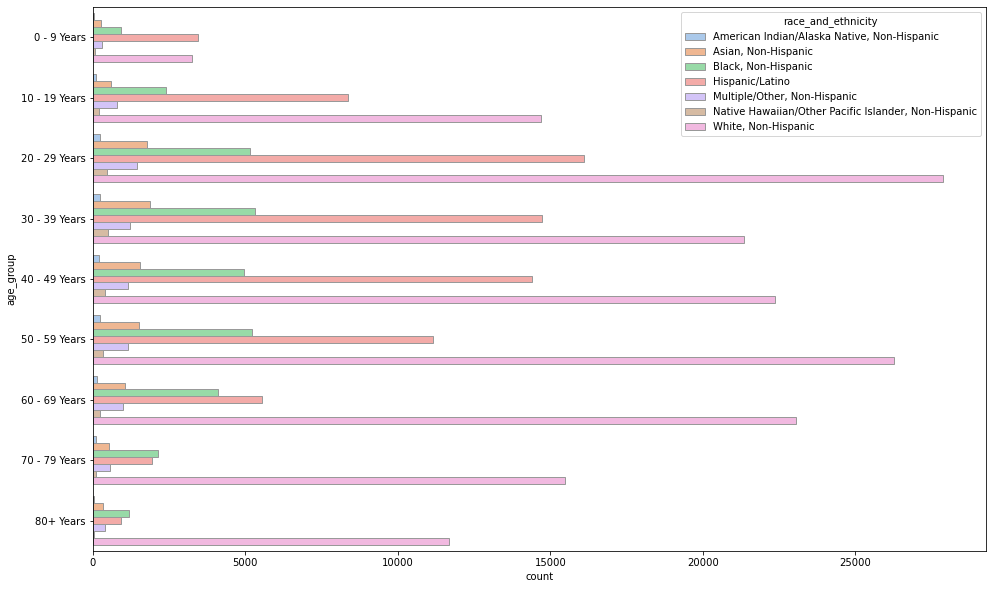

In [43]:
plt.figure(figsize=[16,10])

sns.countplot(y='age_group', hue="race_and_ethnicity",
            palette="pastel", edgecolor=".6",
            data=df_viz);

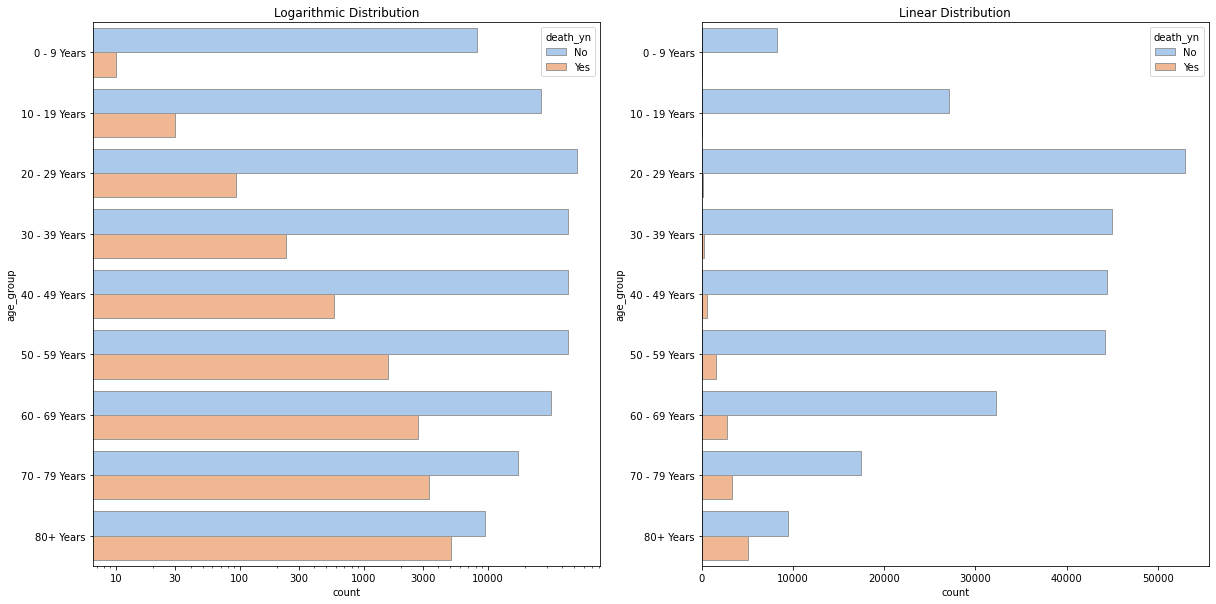

In [65]:
plt.figure(figsize=[20,10])


plt.subplot(1,2,1)
log_ticks=[10, 30, 100, 300, 1000, 3000, 10000]
sns.countplot(y='age_group', hue="death_yn",
            palette="pastel", edgecolor=".6",
            data=df_viz);
plt.xscale('log')
plt.xticks(log_ticks, log_ticks);
plt.title('Logarithmic Distribution')

plt.subplot(1,2,2)
sns.countplot(y='age_group', hue="death_yn",
            palette="pastel", edgecolor=".6",
            data=df_viz);
plt.title('Linear Distribution');

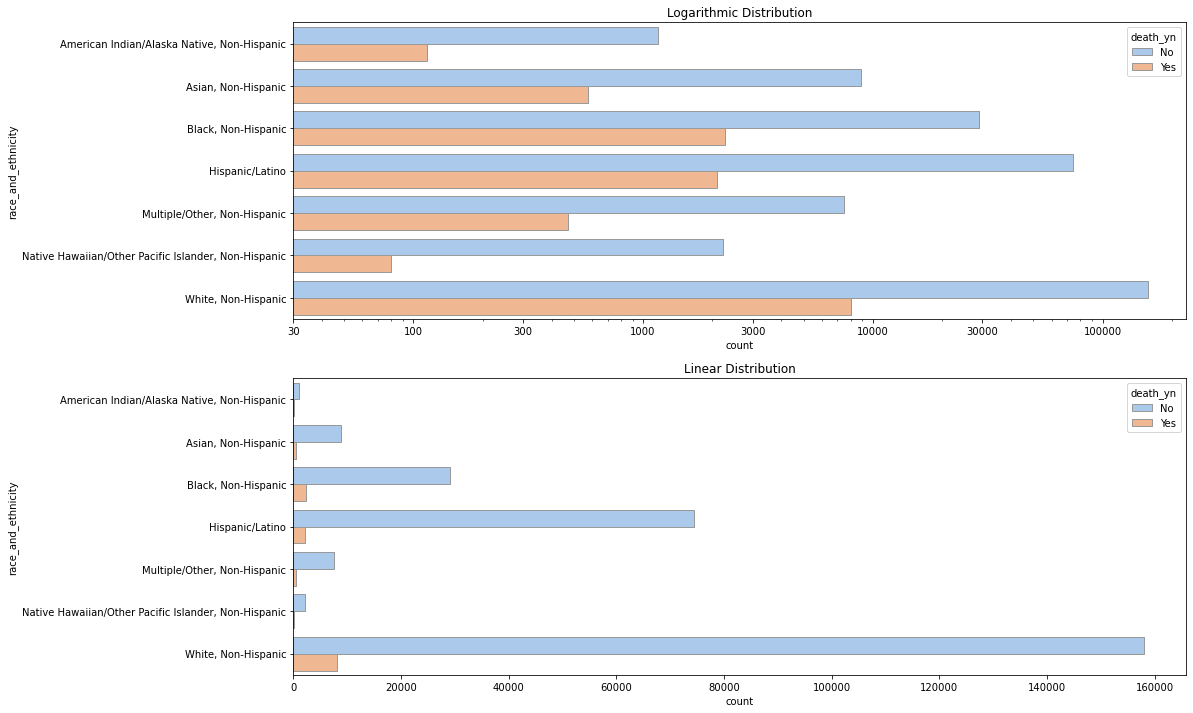

In [64]:
plt.figure(figsize=[16,12])

plt.subplot(2,1,1)
log_ticks2=[30, 100, 300, 1000, 3000, 10000, 30000, 100000]
sns.countplot(y='race_and_ethnicity', hue="death_yn",
            palette="pastel", edgecolor=".6",
            data=df_viz);
plt.xscale('log')
plt.title('Logarithmic Distribution')
plt.xticks(log_ticks2, log_ticks2);

plt.subplot(2,1,2)
plt.title('Linear Distribution')
sns.countplot(y='race_and_ethnicity', hue="death_yn",
            palette="pastel", edgecolor=".6",
            data=df_viz);

In [78]:
death_race = df_viz.query('death_yn == "Yes"')

In [90]:
death_counts1 = death_race['race_and_ethnicity'].value_counts()
death_counts1

White, Non-Hispanic                                     8066
Black, Non-Hispanic                                     2281
Hispanic/Latino                                         2106
Asian, Non-Hispanic                                      574
Multiple/Other, Non-Hispanic                             472
American Indian/Alaska Native, Non-Hispanic              115
Native Hawaiian/Other Pacific Islander, Non-Hispanic      80
Name: race_and_ethnicity, dtype: int64

In [91]:
death_counts2 = death_race['age_group'].value_counts()
death_counts2

80+ Years        5102
70 - 79 Years    3354
60 - 69 Years    2726
50 - 59 Years    1565
40 - 49 Years     580
30 - 39 Years     234
20 - 29 Years      93
10 - 19 Years      30
0 - 9 Years        10
Name: age_group, dtype: int64

In [81]:
race_counts = df_viz['race_and_ethnicity'].value_counts()
race_counts

White, Non-Hispanic                                     165999
Hispanic/Latino                                          76584
Black, Non-Hispanic                                      31370
Asian, Non-Hispanic                                       9440
Multiple/Other, Non-Hispanic                              7964
Native Hawaiian/Other Pacific Islander, Non-Hispanic      2316
American Indian/Alaska Native, Non-Hispanic               1273
Name: race_and_ethnicity, dtype: int64

In [94]:
age_counts = df_viz['age_group'].value_counts()
age_counts

20 - 29 Years    53050
50 - 59 Years    45814
30 - 39 Years    45179
40 - 49 Years    45010
60 - 69 Years    35042
10 - 19 Years    27154
70 - 79 Years    20834
80+ Years        14559
0 - 9 Years       8304
Name: age_group, dtype: int64

In [116]:
proportion_race = (death_counts1 / race_counts)*100
proportion_race = proportion_race.reset_index()
proportion_race

,index,race_and_ethnicity
0,"American Indian/Alaska Native, Non-Hispanic",9.033778
1,"Asian, Non-Hispanic",6.080508
2,"Black, Non-Hispanic",7.271278
3,Hispanic/Latino,2.749922
4,"Multiple/Other, Non-Hispanic",5.926670
5,"Native Hawaiian/Other Pacific Islander, Non-Hi...",3.454231
6,"White, Non-Hispanic",4.859065


In [117]:
proportion_race = proportion_race.rename(columns={'index':'race_and_ethnicity', 'race_and_ethnicity':'death_percentage'})

In [118]:
proportion_race

,race_and_ethnicity,death_percentage
0,"American Indian/Alaska Native, Non-Hispanic",9.033778
1,"Asian, Non-Hispanic",6.080508
2,"Black, Non-Hispanic",7.271278
3,Hispanic/Latino,2.749922
4,"Multiple/Other, Non-Hispanic",5.926670
5,"Native Hawaiian/Other Pacific Islander, Non-Hi...",3.454231
6,"White, Non-Hispanic",4.859065


In [107]:
proportion_age = (death_counts2/ age_counts)*100
proportion_age = proportion_age.reset_index()
proportion_age

,index,age_group
0,0 - 9 Years,0.120424
1,10 - 19 Years,0.110481
2,20 - 29 Years,0.175306
3,30 - 39 Years,0.517940
4,40 - 49 Years,1.288603
5,50 - 59 Years,3.415986
6,60 - 69 Years,7.779236
7,70 - 79 Years,16.098685
8,80+ Years,35.043616


In [108]:
for x in proportion_age.columns:
    if x == 'index':
        proportion_age = proportion_age.rename(columns={x:'age_group1'})
    else:
        proportion_age = proportion_age.rename(columns={x:'death_percentage'})

In [109]:
proportion_age

,age_group1,death_percentage
0,0 - 9 Years,0.120424
1,10 - 19 Years,0.110481
2,20 - 29 Years,0.175306
3,30 - 39 Years,0.517940
4,40 - 49 Years,1.288603
5,50 - 59 Years,3.415986
6,60 - 69 Years,7.779236
7,70 - 79 Years,16.098685
8,80+ Years,35.043616


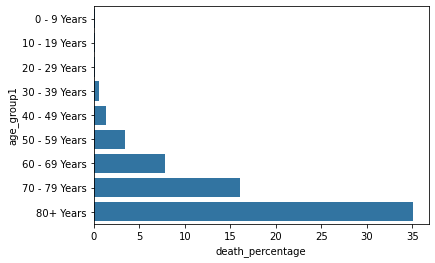

In [124]:
sns.barplot(data=proportion_age, y='age_group1', x='death_percentage', color=base_color);

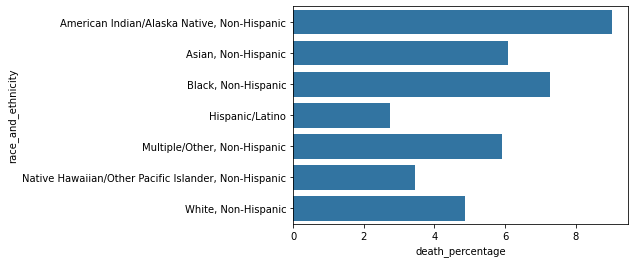

In [125]:
sns.barplot(data=proportion_race, y='race_and_ethnicity', x='death_percentage', color=base_color);